# Análise da Indústria Cinematográfica com o Dataset TMDB

1. Evolução da Produção de Filmes ao Longo dos Anos

2. Quais Gêneros São Mais Produzidos?

3. Qual a Média de Nota por Gênero?

4. Quais Países Mais Produzem Filmes?

5. Quais Produtoras Mais Fazem Filmes?

6. Quais Produtoras Mais Lucram?

7. Quais os Filmes com Maior ROI (Return on Investment)?


# 1. Carregar o CSV no Pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo CSV
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
pd.set_option('display.max_columns', None)
import sqlite3

# Criar conexão com banco em memória (ou use um arquivo .db se quiser salvar)
conn = sqlite3.connect(":memory:")
# Enviar o DataFrame para o SQLite
df.to_sql("tmdb", conn, index=False, if_exists="replace")

df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [2]:
df.shape

(1260572, 24)

In [3]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [4]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260572 entries, 0 to 1260571
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1260572 non-null  int64  
 1   title                 1260559 non-null  object 
 2   vote_average          1260572 non-null  float64
 3   vote_count            1260572 non-null  int64  
 4   status                1260572 non-null  object 
 5   release_date          1018793 non-null  object 
 6   revenue               1260572 non-null  int64  
 7   runtime               1260572 non-null  int64  
 8   adult                 1260572 non-null  bool   
 9   backdrop_path         325324 non-null   object 
 10  budget                1260572 non-null  int64  
 11  homepage              131593 non-null   object 
 12  imdb_id               631806 non-null   object 
 13  original_language     1260572 non-null  object 
 14  original_title        1260559 non-

# 2. Criar banco SQLite e carregar o DataFrame

In [6]:
import sqlite3

# Criar conexão com banco em memória (ou use um arquivo .db se quiser salvar)
conn = sqlite3.connect(":memory:")

# Enviar o DataFrame para o SQLite
df.to_sql("tmdb", conn, index=False, if_exists="replace")

1260572

In [7]:
# Exemplo: total de vendas por tipo de pizza
query = """
SELECT * 
FROM tmdb
LIMIT 5;
"""

df_resultado = pd.read_sql_query(query, conn)
df_resultado

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,0,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,0,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,0,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,0,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,0,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# 3. Verificação e tratamento de dados ausentes

In [8]:
df.isnull().sum()         # total de nulos por coluna


id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             241779
revenue                       0
runtime                       0
adult                         0
backdrop_path            935248
budget                        0
homepage                1128979
imdb_id                  628766
original_language             0
original_title               13
overview                 272971
popularity                    0
poster_path              421365
tagline                 1084067
genres                   529771
production_companies     706524
production_countries     584586
spoken_languages         561501
keywords                 933802
dtype: int64

In [9]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

homepage                89.560850
tagline                 85.998023
backdrop_path           74.192351
keywords                74.077641
production_companies    56.047889
imdb_id                 49.879420
production_countries    46.374662
spoken_languages        44.543350
genres                  42.026239
poster_path             33.426492
overview                21.654535
release_date            19.180102
title                    0.001031
original_title           0.001031
vote_average             0.000000
vote_count               0.000000
revenue                  0.000000
popularity               0.000000
runtime                  0.000000
original_language        0.000000
status                   0.000000
budget                   0.000000
adult                    0.000000
id                       0.000000
dtype: float64

In [10]:
df.dtypes

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object

In [11]:
# Transformando coluna data para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# 4. Feature Engineering

In [12]:
# Criando coluna de ROI (Return of investment) = valor obtido - valor investido
df['ROI%'] = ((df['revenue'] - df['budget']) / df['revenue'])*100
df['ROI%'] = df['ROI%'].round(2)
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52


In [13]:
# Criando colunas de data (ano, mes, dia e dia da semana!)
df["ano"] = df["release_date"].dt.year
df["mes"] = df["release_date"].dt.month
df["dia"] = df["release_date"].dt.day
df["dia_semana"] = df["release_date"].dt.day_name()  # Segunda, Terça, etc.

df['ano'] = df['ano'].astype('Int64')
df['mes'] = df['mes'].astype('Int64')
df['dia'] = df['dia'].astype('Int64')

df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%,ano,mes,dia,dia_semana
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58,2008,7,16,Wednesday
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89,2009,12,15,Tuesday
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52,2012,4,25,Wednesday


In [14]:
df['é_sucesso'] = df['revenue'] > df['budget']
df.head(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,ROI%,ano,mes,dia,dia_semana,é_sucesso
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",80.62,2010,7,15,Thursday,True
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",76.49,2014,11,5,Wednesday,True
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",81.58,2008,7,16,Wednesday,True
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",91.89,2009,12,15,Tuesday,True
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",85.52,2012,4,25,Wednesday,True


In [15]:
# Atualizo as colunas no SQL
df.to_sql("tmdb", conn, index=False, if_exists="replace")

1260572

# 5. EDA com SQL e Python!

## 1. Evolução da Produção de Filmes ao Longo dos Anos

In [16]:
query = """
SELECT ano, COUNT(DISTINCT id) AS total_filmes 
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY ano
ORDER BY ano desc
"""

df_resultado = pd.read_sql_query(query, conn)
df_resultado

,ano,total_filmes
0,2025,17643
1,2024,36301
2,2023,47523
3,2022,46796
4,2021,45241
5,2020,41810
6,2019,42552
7,2018,38655
8,2017,36222
9,2016,32662


## 2. Quais Gêneros São Mais Produzidos?

In [17]:
import pandas as pd
import ast

def parse_genres(val):
    if pd.isna(val):
        return []
    if isinstance(val, list):
        return val
    s = str(val).strip()
    # caso seja string com colchetes/aspas: "['Action', 'Drama']"
    if s.startswith('[') and s.endswith(']'):
        try:
            lst = ast.literal_eval(s)   # vira lista Python
            return [str(x).strip() for x in lst]
        except Exception:
            # fallback: remove colchetes e segue no split
            s = s[1:-1]
    # caso padrão: "Action, Drama, Thriller"
    return [g.strip() for g in s.split(',') if g.strip()]

# 1) converter cada célula para lista real
df['genres'] = df['genres'].apply(parse_genres)

# 2) explodir em linhas
df_exploded = df.explode('genres', ignore_index=True)

# 3) tirar vazios, se houver
df_exploded = df_exploded[df_exploded['genres'].astype(str).str.len() > 0]


# Enviar o DataFrame para o SQLite
df_exploded.to_sql("tmdb", conn, index=False, if_exists="replace")


1643451

In [18]:
query = """
SELECT genres, COUNT(genres) AS total_filmes_genero
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY genres
ORDER BY total_filmes_genero desc
LIMIT 10;
"""

df_resultado_generos = pd.read_sql_query(query, conn)
df_resultado_generos

,genres,total_filmes_genero
0,Drama,137655
1,Documentary,127841
2,Comedy,82299
3,Horror,41291
4,Animation,35819
5,Music,35334
6,Thriller,33553
7,Romance,33257
8,Action,26359
9,Crime,17494


## 3. Qual a Média de Nota por Gênero?

In [19]:
query = """
SELECT genres, AVG(vote_average) AS avaliação_média
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY genres
ORDER BY avaliação_média desc
LIMIT 20;
"""
df_resultado = pd.read_sql_query(query, conn)
df_resultado

,genres,avaliação_média
0,TV Movie,4.275172
1,Adventure,3.836614
2,Family,3.603880
3,Action,3.573547
4,War,3.557752
5,History,3.488130
6,Thriller,3.480158
7,Crime,3.461268
8,Romance,3.375287
9,Mystery,3.256059


## 5. Quais Países Mais Produzem Filmes?

In [20]:
import pandas as pd
import ast
import numpy as np
import json

# Função para transformar a célula em lista limpa de países
def parse_countries(val):
    if val is None or (isinstance(val, float) and np.isnan(val)):
        return []
    if isinstance(val, list):
        return [str(x).strip() for x in val]
    s = str(val).strip()
    if s.startswith('[') and s.endswith(']'):
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, list):
                return [str(x).strip() for x in parsed]
        except:
            pass
    return [g.strip() for g in s.split(',') if g.strip()]

# 1) Converte a coluna para lista de países
df['production_countries'] = df['production_countries'].apply(parse_countries)

# 2) Explode países
df_exploded = df.explode('production_countries', ignore_index=True)

# 3) Remove vazios
df_exploded = df_exploded[df_exploded['production_countries'] != '']

# 4) Converte outras listas/dicts para string JSON (assim o SQLite aceita)
def to_jsonable(x):
    if isinstance(x, (list, dict)):
        return json.dumps(x, ensure_ascii=False)
    return x

df_exploded = df_exploded.applymap(to_jsonable)

# 5) Envia para SQLite
df_exploded.to_sql("tmdb", conn, index=False, if_exists="replace")


/var/folders/6c/d15wybbn4bsc8nf0jjcp02fw0000gn/T/ipykernel_5269/732545107.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_exploded = df_exploded.applymap(to_jsonable)


1325960

In [21]:
query = """
SELECT production_countries, COUNT(production_countries) as quantidade_filmes
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY production_countries
ORDER BY quantidade_filmes desc
LIMIT 20;
"""
df_resultado_paises = pd.read_sql_query(query, conn)
df_resultado_paises

,production_countries,quantidade_filmes
0,United States of America,122280
1,France,28735
2,Japan,28420
3,United Kingdom,27022
4,Germany,22946
5,Canada,18824
6,Brazil,13729
7,India,13667
8,Spain,10223
9,Russia,9388


In [22]:
query = """
SELECT production_countries, COUNT(production_countries) as quantidade_filmes
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY production_countries
ORDER BY quantidade_filmes desc
LIMIT 20;
"""
df_resultado = pd.read_sql_query(query, conn)
df_resultado

,production_countries,quantidade_filmes
0,United States of America,122280
1,France,28735
2,Japan,28420
3,United Kingdom,27022
4,Germany,22946
5,Canada,18824
6,Brazil,13729
7,India,13667
8,Spain,10223
9,Russia,9388


## 6. Quais Produtoras Mais Produzem Filmes?

In [23]:
import pandas as pd
import ast
import numpy as np
import json

# Função para transformar a célula em lista limpa de produtoras
def parse_companies(val):
    if val is None or (isinstance(val, float) and np.isnan(val)):
        return []
    if isinstance(val, list):
        return [str(x).strip() for x in val]
    s = str(val).strip()
    if not s:
        return []
    # Caso seja string com colchetes: "['A', 'B']"
    if s.startswith('[') and s.endswith(']'):
        try:
            parsed = ast.literal_eval(s)
            if isinstance(parsed, list):
                return [str(x).strip() for x in parsed]
        except Exception:
            pass
    # Caso padrão: "A, B, C"
    return [g.strip() for g in s.split(',') if g.strip()]

# 1) Converte a coluna para lista de produtoras
df['production_companies'] = df['production_companies'].apply(parse_companies)

# 2) Explode produtoras
df_exploded = df.explode('production_companies', ignore_index=True)

# 3) Remove vazios
df_exploded = df_exploded[df_exploded['production_companies'] != '']

# 4) Converte outras listas/dicts para string JSON (assim o SQLite aceita)
def to_jsonable(x):
    if isinstance(x, (list, dict)):
        return json.dumps(x, ensure_ascii=False)
    return x

df_exploded = df_exploded.applymap(to_jsonable)

# 5) Envia para SQLite
df_exploded.to_sql("tmdb_companies", conn, index=False, if_exists="replace")

print("OK! Tabela 'tmdb_companies' criada com 1 linha por produtora.")


/var/folders/6c/d15wybbn4bsc8nf0jjcp02fw0000gn/T/ipykernel_5269/25120681.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_exploded = df_exploded.applymap(to_jsonable)


OK! Tabela 'tmdb_companies' criada com 1 linha por produtora.


In [24]:
query = """
SELECT
  production_companies,
  COUNT(*) AS quantidade_filmes
FROM tmdb_companies
WHERE ano BETWEEN 2000 AND 2025
  AND CAST(adult AS INTEGER) = 0   -- só não-adulto
  AND production_companies IS NOT NULL
GROUP BY production_companies
ORDER BY quantidade_filmes DESC
LIMIT 10;
"""
df_resultado_prods = pd.read_sql_query(query, conn)
df_resultado_prods

,production_companies,quantidade_filmes
0,ARTE,2602
1,BBC,1783
2,ZDF,1573
3,ARD,1435
4,Česká televize,1125
5,France Télévisions,1125
6,Canal+,1112
7,ONF | NFB,841
8,CNC,777
9,SVT,651


## 7. Quais Produtoras Mais Lucram?

Considerações:

Se um filme tem 3 produtoras e você explodiu a lista, o mesmo lucro do filme está sendo contado 3 vezes (uma para cada produtora).
Isso significa que os números não representam “lucro real da produtora” e sim “lucro de filmes onde a produtora participou” (com duplicidade).

O código abaixo tende a identifica a qtd de produtoras por cada e filme e dividir.

In [26]:
import pandas as pd
import numpy as np

# 1) Calcular lucro bruto
df_exploded['profit'] = df_exploded['revenue'].fillna(0) - df_exploded['budget'].fillna(0)

# 2) Filtrar apenas não-adultos (opcional)
df_filtrado = df_exploded[df_exploded['adult'].astype(int) == 0]

# 3) Contar quantas produtoras cada filme tem
prod_count = df_filtrado.groupby('id')['production_companies'].transform('nunique')

# 4) Dividir o lucro pelo número de produtoras
df_filtrado['profit_share'] = df_filtrado['profit'] / prod_count.replace(0, np.nan)

# 5) Somar por produtora
lucro_por_produtora = (
    df_filtrado.groupby('production_companies', as_index=False)['profit_share']
    .sum()
    .rename(columns={'profit_share': 'lucro_atribuido'})
    .sort_values('lucro_atribuido', ascending=False)
)

# 6) (Opcional) remover produtoras vazias
lucro_por_produtora = lucro_por_produtora[
    lucro_por_produtora['production_companies'].notna() &
    (lucro_por_produtora['production_companies'] != '')
]

pd.options.display.float_format = '{:,.0f}'.format
lucro_por_produtora = lucro_por_produtora.head(10)


/var/folders/6c/d15wybbn4bsc8nf0jjcp02fw0000gn/T/ipykernel_5269/2345741785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['profit_share'] = df_filtrado['profit'] / prod_count.replace(0, np.nan)


In [27]:
lucro_por_produtora

,production_companies,lucro_atribuido
93400,Marvel Studios,"19,702,980,695"
154707,Universal Pictures,"19,185,791,883"
111161,Paramount,"16,172,721,497"
159603,Walt Disney Pictures,"15,608,209,637"
159849,Warner Bros. Pictures,"15,570,421,885"
763,20th Century Fox,"14,969,870,448"
33168,Columbia Pictures,"12,228,370,723"
88295,Lucasfilm Ltd.,"7,743,224,815"
114332,Pixar,"7,175,054,354"
103038,New Line Cinema,"5,997,885,168"


In [28]:
import pandas as pd
import numpy as np

df_calc = df_exploded.copy()

# 1) Tipos e limpeza
df_calc['revenue'] = pd.to_numeric(df_calc['revenue'], errors='coerce').fillna(0)
df_calc['budget']  = pd.to_numeric(df_calc['budget'],  errors='coerce').fillna(0)

# adult pode ter vindo como bool/str; garantimos 0/1
df_calc['adult'] = pd.to_numeric(df_calc['adult'], errors='coerce').fillna(0).astype(int)

# 2) Lucro bruto por filme (mesma fórmula do SQL)
df_calc['profit'] = df_calc['revenue'] - df_calc['budget']

# 3) (opcional) filtro de anos e não-adulto, igual ao seu SQL
df_calc = df_calc[(df_calc['ano'] >= 2000) & (df_calc['ano'] <= 2025) & (df_calc['adult'] == 0)]

# 4) Nº de produtoras por filme (no explode), para dividir o lucro
prod_count = df_calc.groupby('id')['production_companies'].transform('nunique')

# 5) Lucro proporcional por produtora
df_calc['profit_share'] = df_calc['profit'] / prod_count.replace(0, np.nan)
df_calc['profit_share'] = df_calc['profit_share'].fillna(0)

# 6) Filmes da Marvel Studios
df_marvel = (
    df_calc[df_calc['production_companies'].str.strip().eq('Marvel Studios')]
    .loc[:, ['id','title','ano','revenue','budget','profit','profit_share']]
    .sort_values('profit', ascending=False)
    .reset_index(drop=True)
)

# 7) Resultado agregado (lucro atribuído total)
lucro_atribuido_marvel = df_marvel['profit_share'].sum()

# --- impressão amigável ---
pd.options.display.float_format = '{:,.0f}'.format
print(df_marvel.head(30))  # veja os top 30 que mais contribuíram
print(f"\nLucro atribuído total à Marvel Studios: {lucro_atribuido_marvel:,.0f}")


        id                                        title   ano     revenue  \
0   299534                            Avengers: Endgame 2,019  2800000000   
1   299536                       Avengers: Infinity War 2,018  2052415039   
2   634649                      Spider-Man: No Way Home 2,021  1921847111   
3    24428                                 The Avengers 2,012  1518815515   
4   284054                                Black Panther 2,018  1349926083   
5    99861                      Avengers: Age of Ultron 2,015  1405403694   
6    68721                                   Iron Man 3 2,013  1215577205   
7   299537                               Captain Marvel 2,019  1131416446   
8   429617                    Spider-Man: Far From Home 2,019  1131927996   
9   271110                   Captain America: Civil War 2,016  1155046416   
10  453395  Doctor Strange in the Multiverse of Madness 2,022   955775804   
11  315635                       Spider-Man: Homecoming 2,017   880166924   

## Quais filmes geraram maior receita ou lucro (ROI)?

In [29]:
query = """
SELECT title, (revenue - budget) AS profit
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
  AND CAST(adult AS INTEGER) = 0   -- só não-adulto
  AND production_companies IS NOT NULL
ORDER BY profit desc
LIMIT 10;
"""

df_resultado = pd.read_sql_query(query, conn)
df_resultado

,title,profit
0,TikTok Rizz Party,2750000000
1,Avatar,2686706026
2,Avatar,2686706026
3,Avengers: Endgame,2444000000
4,Best Of Joy,1999999000
5,Avatar: The Way of Water,1860250281
6,Star Wars: The Force Awakens,1823223624
7,Avengers: Infinity War,1752415039
8,Spider-Man: No Way Home,1721847111
9,IPL 2025,1688000000


# 6. Visualização Gráfica dos Dados

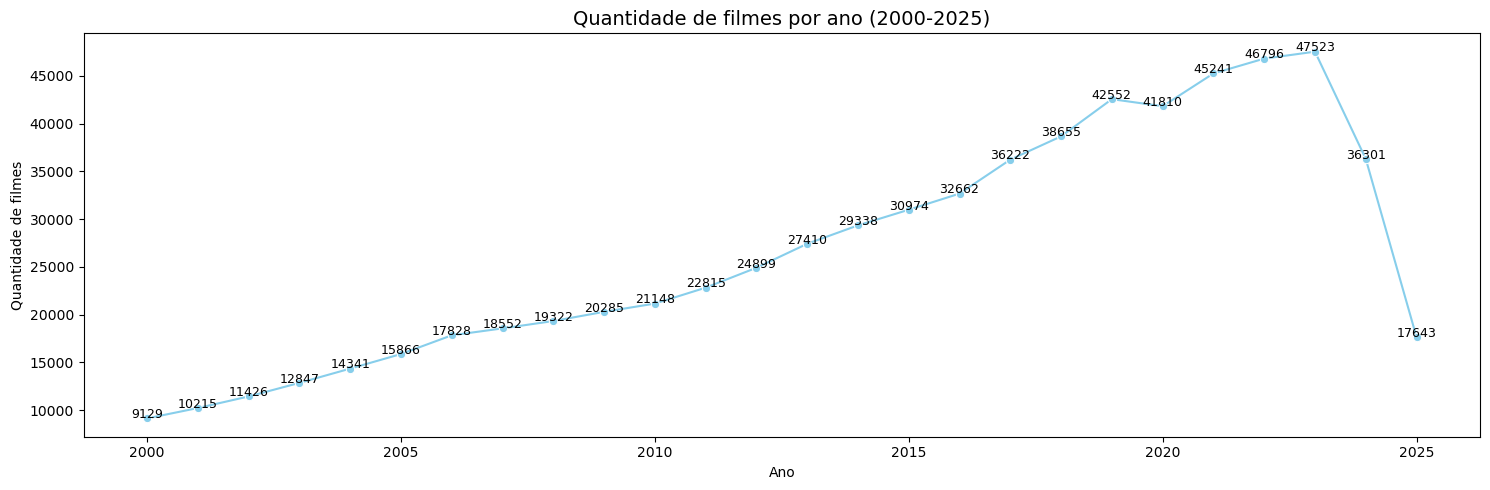

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Query
query = """
SELECT ano, COUNT(DISTINCT id) AS total_filmes 
FROM tmdb
WHERE ano BETWEEN 2000 AND 2025
GROUP BY ano
ORDER BY ano;
"""
df_resultado = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(15, 5))
ax = sns.lineplot(
    data=df_resultado,
    x="ano",
    y="total_filmes",
    marker="o",
    color="skyblue"
)

# Anotar valores no ponto certo
for ano, total in zip(df_resultado["ano"], df_resultado["total_filmes"]):
    ax.text(ano, total + 20, str(int(total)), ha='center', fontsize=9)

# Personalização
plt.title("Quantidade de filmes por ano (2000-2025)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Quantidade de filmes")
plt.tight_layout()
plt.show()


In [31]:
df_resultado_generos

,genres,total_filmes_genero
0,Drama,137655
1,Documentary,127841
2,Comedy,82299
3,Horror,41291
4,Animation,35819
5,Music,35334
6,Thriller,33553
7,Romance,33257
8,Action,26359
9,Crime,17494


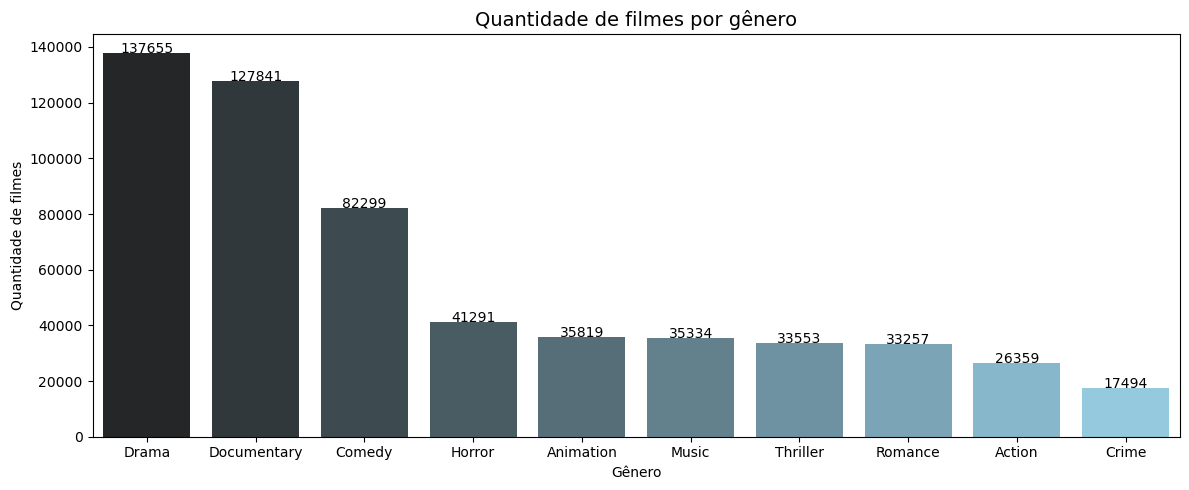

In [32]:
# Quantidade de filmes por ano

df_resultado_generos

# Preparando o plot
plt.figure(figsize=(12, 5))  # gráfico mais compacto
ax = sns.barplot(
    x=df_resultado_generos["genres"],
    y=df_resultado_generos["total_filmes_genero"],
    hue=df_resultado_generos["genres"],
    palette="dark:skyblue",
    #legend = 'brief'
)

# Adicionando os valores em cima das barras
for i, v in enumerate(df_resultado_generos["total_filmes_genero"]):
    ax.text(i, v + 20, str(int(v)), ha='center', fontsize=10)

# Personalizando o gráfico
plt.title("Quantidade de filmes por gênero", fontsize=14)
plt.xlabel("Gênero")
plt.ylabel("Quantidade de filmes")
plt.tight_layout()
plt.show()

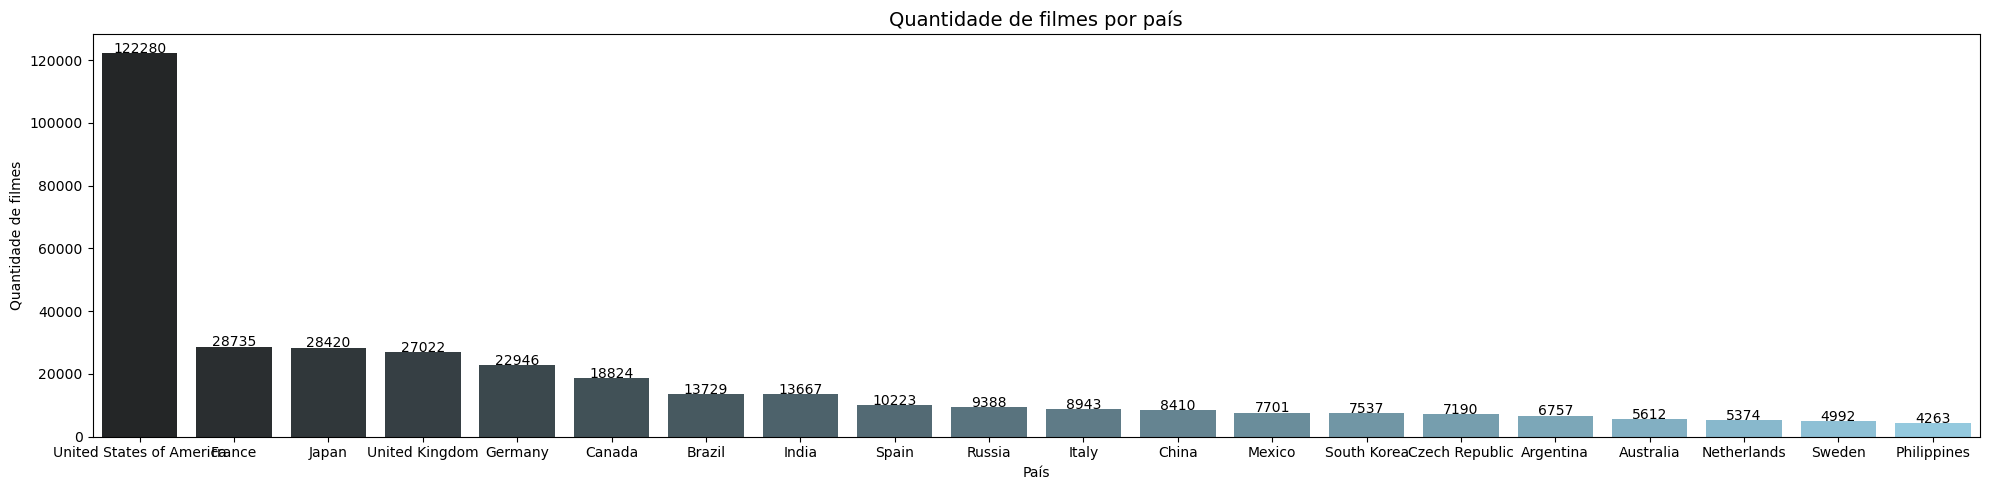

In [33]:
# Quantidade de filmes por ano

df_resultado_paises

# Preparando o plot
plt.figure(figsize=(20, 5))  # gráfico mais compacto
ax = sns.barplot(
    x=df_resultado_paises["production_countries"],
    y=df_resultado_paises["quantidade_filmes"],
    hue=df_resultado_paises["production_countries"],
    palette="dark:skyblue",
    #legend = 'brief'
)

# Adicionando os valores em cima das barras
for i, v in enumerate(df_resultado_paises["quantidade_filmes"]):
    ax.text(i, v + 20, str(int(v)), ha='center', fontsize=10)

# Personalizando o gráfico
plt.title("Quantidade de filmes por país", fontsize=14)
plt.xlabel("País")
plt.ylabel("Quantidade de filmes")
plt.tight_layout()
plt.show()

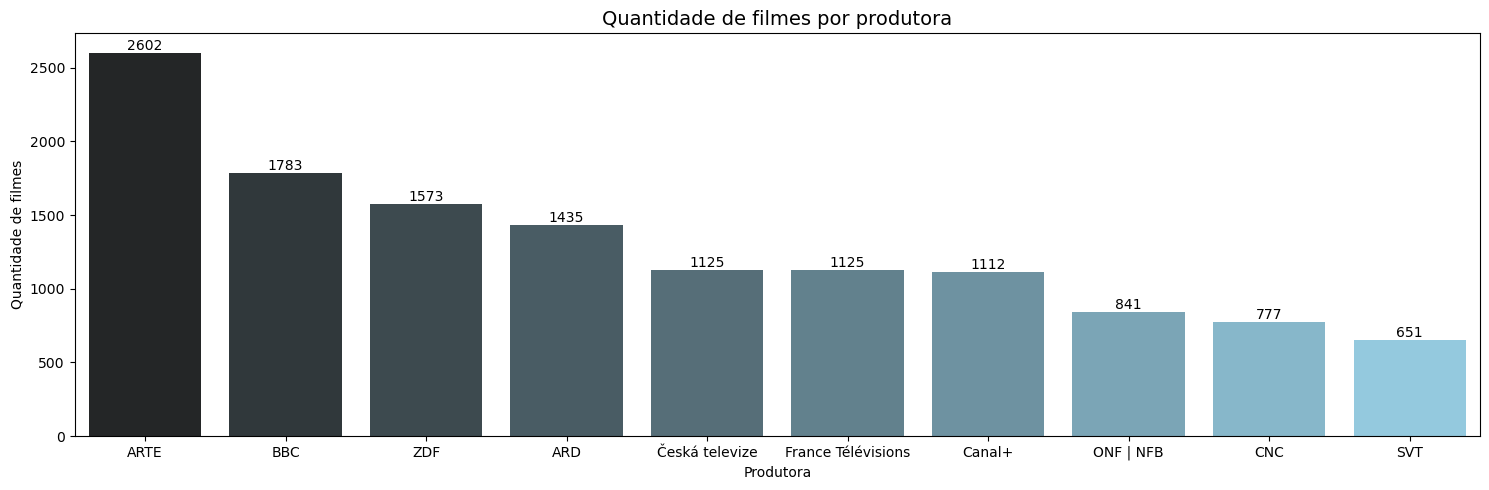

In [34]:
# Quantidade de filmes por ano

# Preparando o plot
plt.figure(figsize=(15, 5))  # gráfico mais compacto
ax = sns.barplot(
    x=df_resultado_prods["production_companies"],
    y=df_resultado_prods["quantidade_filmes"],
    hue=df_resultado_prods["production_companies"],
    palette="dark:skyblue",
    #legend = 'brief'
)

# Adicionando os valores em cima das barras
for i, v in enumerate(df_resultado_prods["quantidade_filmes"]):
    ax.text(i, v + 20, str(int(v)), ha='center', fontsize=10)

# Personalizando o gráfico
plt.title("Quantidade de filmes por produtora", fontsize=14)
plt.xlabel("Produtora")
plt.ylabel("Quantidade de filmes")
plt.tight_layout()
plt.show()

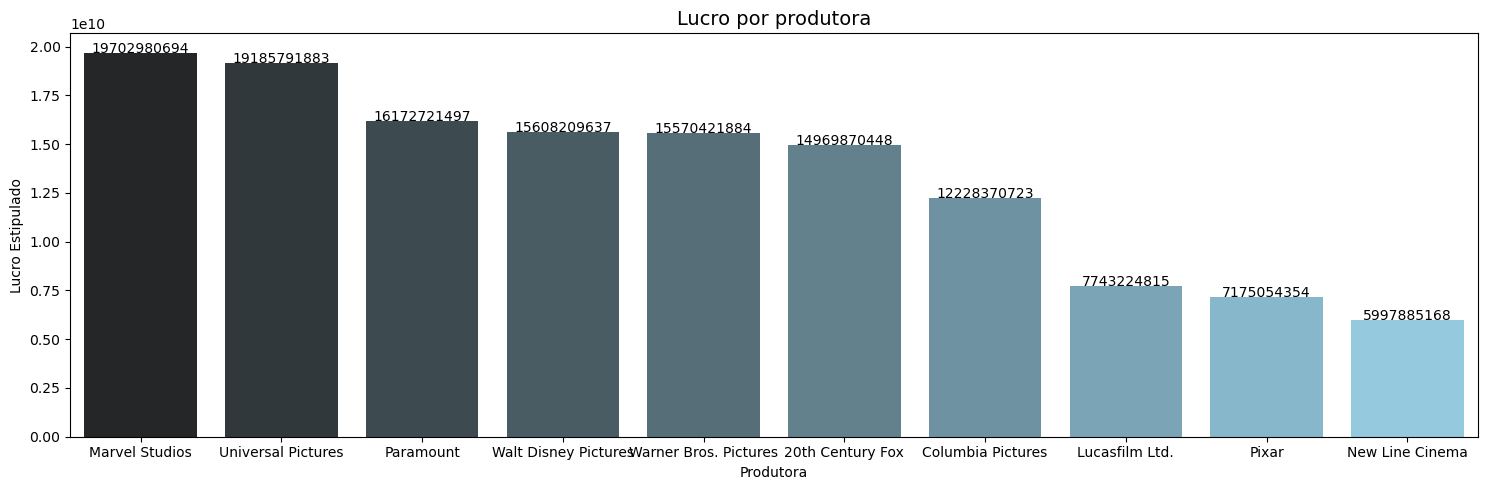

In [36]:
# Quantidade de filmes por ano

# Preparando o plot
plt.figure(figsize=(15, 5))  # gráfico mais compacto
ax = sns.barplot(
    x=lucro_por_produtora["production_companies"],
    y=lucro_por_produtora["lucro_atribuido"],
    hue=lucro_por_produtora["production_companies"],
    palette="dark:skyblue",
    #legend = 'brief'
)

# Adicionando os valores em cima das barras
for i, v in enumerate(lucro_por_produtora["lucro_atribuido"]):
    ax.text(i, v + 20, str(int(v)), ha='center', fontsize=10)

# Personalizando o gráfico
plt.title("Lucro por produtora", fontsize=14)
plt.xlabel("Produtora")
plt.ylabel("Lucro Estipulado")
plt.tight_layout()
plt.show()